In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import json
import pandas as pd
import lib.galaxy_utilities as gu
from gzbuilderspirals.oo import Pipeline
import matplotlib.pyplot as plt

In [3]:
subject_id = 20902081

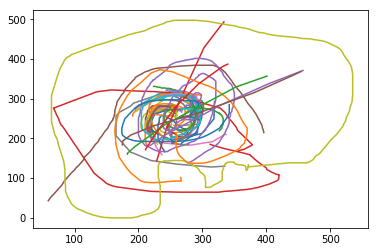

In [4]:
drawn_arms = gu.get_drawn_arms(subject_id, gu.classifications)
for arm in drawn_arms:
    plt.plot(*arm.T)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


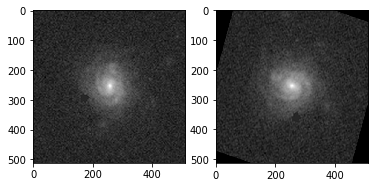

In [6]:
gal, angle = gu.get_galaxy_and_angle(subject_id)
pic_array, deprojected_array = gu.get_image(gal, subject_id, angle)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(pic_array, cmap='gray')
ax[1].imshow(deprojected_array, cmap='gray');

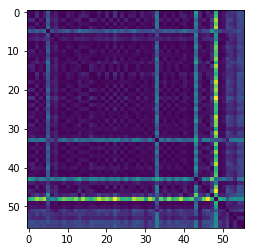

In [9]:
distances = gu.get_distances(subject_id)
if distances is not None:
    plt.imshow(distances)

In [11]:
p = Pipeline(drawn_arms, distances=distances, phi=angle, ba=gal['SERSIC_BA'])

In [68]:
arms = [p.get_arm(i, clean_points=True) for i in range(max(p.db.labels_) + 1)]

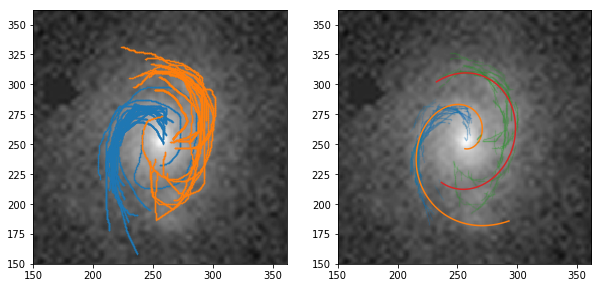

In [69]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(pic_array, cmap='gray')
ax[1].imshow(pic_array, cmap='gray')
for arm in arms:
    ax[0].plot(*arm.coords.T, '.', markersize=1)
    ax[1].plot(*arm.coords[arm.outlier_mask].T, '.', markersize=1, alpha=0.1)
    ax[1].plot(*arm.reprojected_log_spiral.T)
    
ax[0].set_xlim(150, 362); ax[0].set_ylim(150, 362)

ax[1].set_xlim(150, 362); ax[1].set_ylim(150, 362);